Conduct EDA For entire dataset (i.e: not differentiating between 1st and 2nd treatments)

Correlation between average group contribution and average individual earnings in the group: 0.6959716365911806


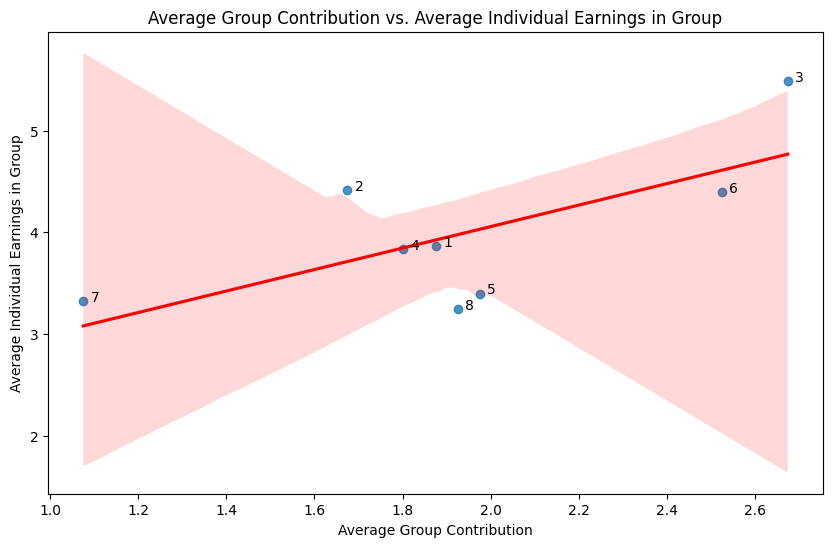

In [9]:
import pandas as pd

df = pd.read_csv("/workspace/Voluntary-Contributions/merged_data.csv")

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average contribution per group
group_avg_contributions = df.groupby('Group')['Contribution'].mean().reset_index(name='avg_contribution')

# Calculate the average cumulative earnings per person in each group
group_avg_individual_earnings = df.groupby('Group')['Earnings'].mean().reset_index(name='avg_individual_earnings')

# Merge the two DataFrames on 'group'
group_stats = pd.merge(group_avg_contributions, group_avg_individual_earnings, on='Group')

# Calculate the correlation
correlation = group_stats['avg_contribution'].corr(group_stats['avg_individual_earnings'])
print(f"Correlation between average group contribution and average individual earnings in the group: {correlation}")

# Create the scatterplot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=group_stats, x='avg_contribution', y='avg_individual_earnings', line_kws={"color": "red"})
plt.xlabel('Average Group Contribution')
plt.ylabel('Average Individual Earnings in Group')
plt.title('Average Group Contribution vs. Average Individual Earnings in Group')

# Add group labels to each point with a slight x-offset for spacing
for i in range(len(group_stats)):
    plt.text(
        x=group_stats['avg_contribution'][i] + 0.017,  # Offset x-position by 0.1
        y=group_stats['avg_individual_earnings'][i], 
        s=group_stats['Group'][i],
        fontdict=dict(color="black", size=10),
        ha='left'
    )

# Show the plot
plt.show()



In [ ]:
# Group 3 had very high average contribution per member (~2.7), as well as very high average individual earnings (~5.5).
# How did they manage this?

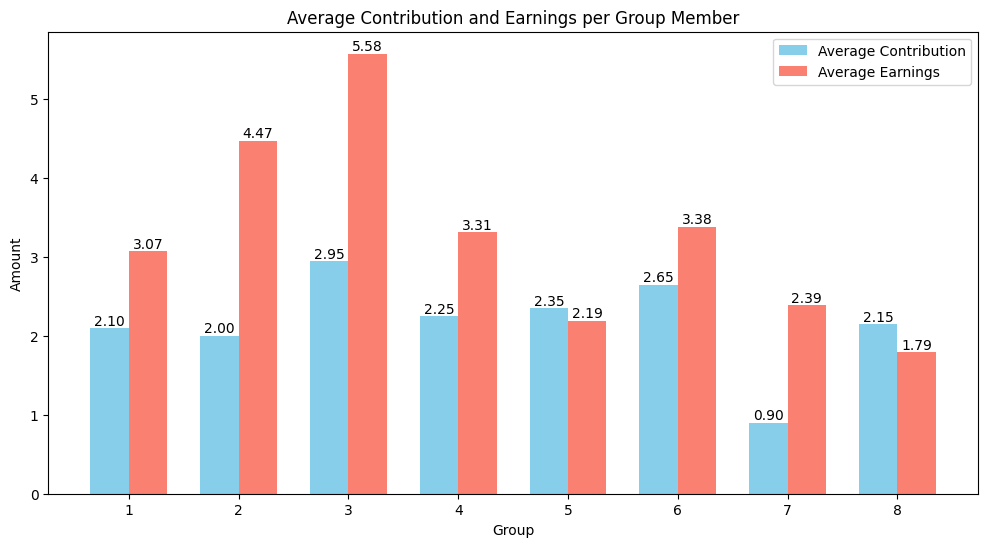

In [25]:
# Create bar graph
plt.figure(figsize=(12, 6))

# Width for each bar group
bar_width = 0.35

# X-axis locations for each group
group_indices = range(1, len(group_stats) + 1)  # Start indexing from 1 to align with group numbers

# Plot bars for average contribution
bars1 = plt.bar(
    [x - bar_width / 2 for x in group_indices], 
    group_stats['avg_contribution'], 
    width=bar_width, 
    label='Average Contribution', 
    color='skyblue'
)

# Plot bars for average earnings
bars2 = plt.bar(
    [x + bar_width / 2 for x in group_indices], 
    group_stats['avg_individual_earnings'], 
    width=bar_width, 
    label='Average Earnings', 
    color='salmon'
)

# Adding labels and title
plt.xlabel('Group')
plt.ylabel('Amount')
plt.title('Average Contribution and Earnings per Group Member')
plt.legend()

# Add labels above each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()



# EDA for Experiment part one (no punishments)

Correlation between average group contribution and average individual earnings in the group: 1.0


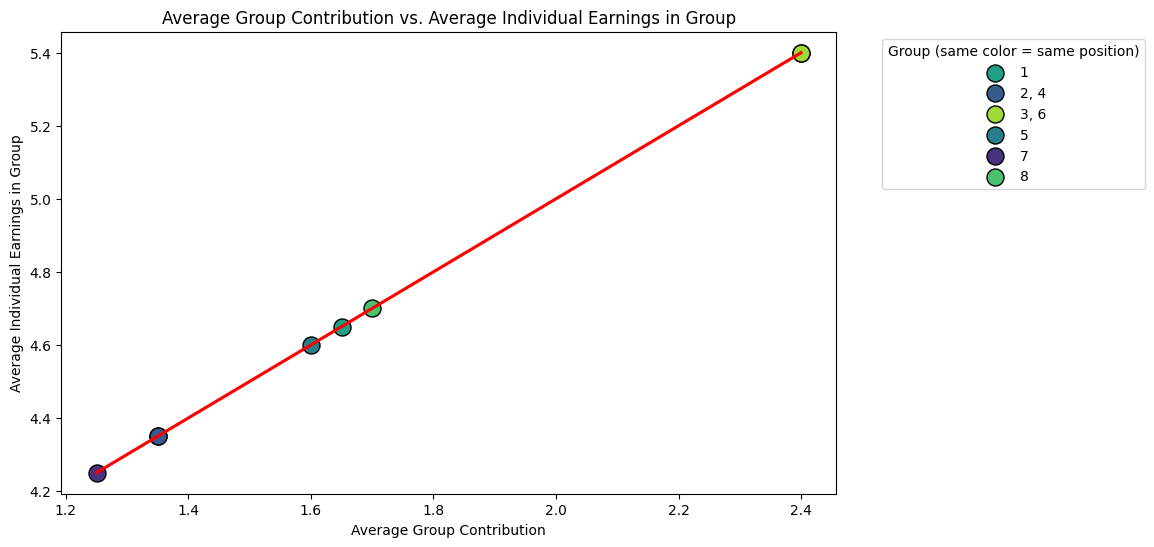

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("/workspace/Voluntary-Contributions/test_1.csv")

# Calculate the average contribution per group
group_avg_contributions = df.groupby('Group')['Contribution'].mean().reset_index(name='avg_contribution')

# Calculate the average cumulative earnings per person in each group
group_avg_individual_earnings = df.groupby('Group')['Earnings'].mean().reset_index(name='avg_individual_earnings')

# Merge the two DataFrames on 'Group'
group_stats = pd.merge(group_avg_contributions, group_avg_individual_earnings, on='Group')

# Check for missing groups in the data
missing_groups = set(range(1, df['Group'].max() + 1)) - set(group_stats['Group'])
if missing_groups:
    print(f"Missing groups in data: {missing_groups}")

# Calculate the correlation
correlation = group_stats['avg_contribution'].corr(group_stats['avg_individual_earnings'])
print(f"Correlation between average group contribution and average individual earnings in the group: {correlation}")

# Group by unique positions to assign colors
group_stats['pos_tuple'] = list(zip(group_stats['avg_contribution'], group_stats['avg_individual_earnings']))
position_groups = group_stats.groupby('pos_tuple')['Group'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
position_groups['Color'] = sns.color_palette("viridis", len(position_groups))

# Merge colors back to the original DataFrame
group_stats = pd.merge(group_stats, position_groups, on='pos_tuple', how='left')

# Plot with unique colors for each position group
plt.figure(figsize=(10, 6))
for i, row in group_stats.iterrows():
    plt.scatter(
        row['avg_contribution'], 
        row['avg_individual_earnings'], 
        color=row['Color'], 
        s=150, 
        edgecolor='black', 
        label=row['Group_y'] if row['Group_y'] else row['Group_x'] 
    )

# Add a regression line without grouping by color
sns.regplot(
    data=group_stats, 
    x='avg_contribution', 
    y='avg_individual_earnings', 
    scatter=False,      
    color='red'         
)

# Customize plot
plt.xlabel('Average Group Contribution')
plt.ylabel('Average Individual Earnings in Group')
plt.title('Average Group Contribution vs. Average Individual Earnings in Group')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Group (same color = same position)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



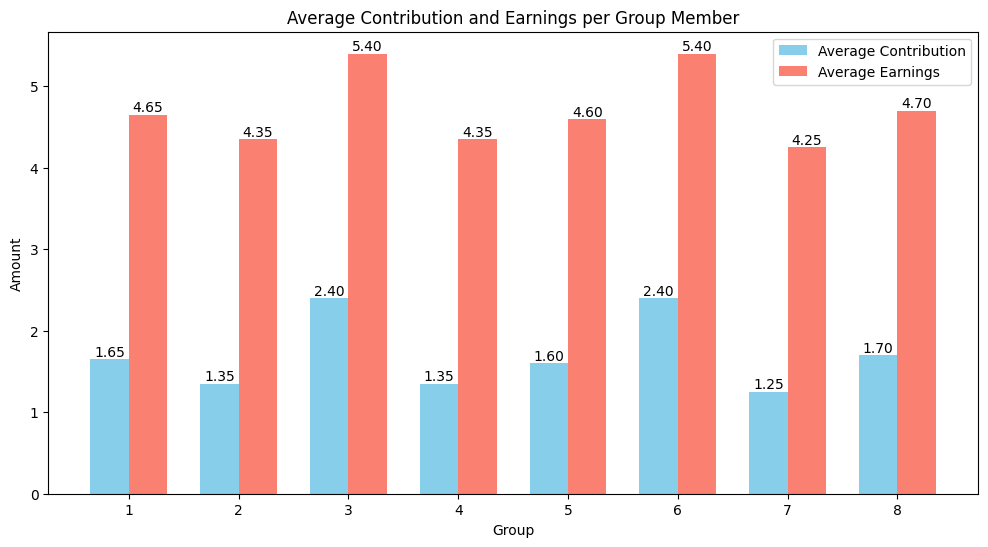

In [16]:
import matplotlib.pyplot as plt

# Set up the bar graph with group names on the x-axis and two sets of bars
plt.figure(figsize=(12, 6))

# Width for each bar group
bar_width = 0.35

# X-axis locations for each group
group_indices = range(len(group_stats))

# Plot bars for average contribution
contrib_bars = plt.bar(
    [x - bar_width / 2 for x in group_indices], 
    group_stats['avg_contribution'], 
    width=bar_width, 
    label='Average Contribution', 
    color='skyblue'
)

# Plot bars for average earnings
earnings_bars = plt.bar(
    [x + bar_width / 2 for x in group_indices], 
    group_stats['avg_individual_earnings'], 
    width=bar_width, 
    label='Average Earnings', 
    color='salmon'
)

# Adding labels and title
plt.xlabel('Group')
plt.ylabel('Amount')
plt.title('Average Contribution and Earnings per Group Member')
plt.xticks(group_indices, group_stats['Group'])
plt.legend()

# Adding data labels on top of each bar
for bar in contrib_bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{bar.get_height():.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

for bar in earnings_bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{bar.get_height():.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Display the plot
plt.show()


# EDA for experiment part two (w/ punishments)

Correlation between average group contribution and average individual earnings in the group: 0.4979171105107199


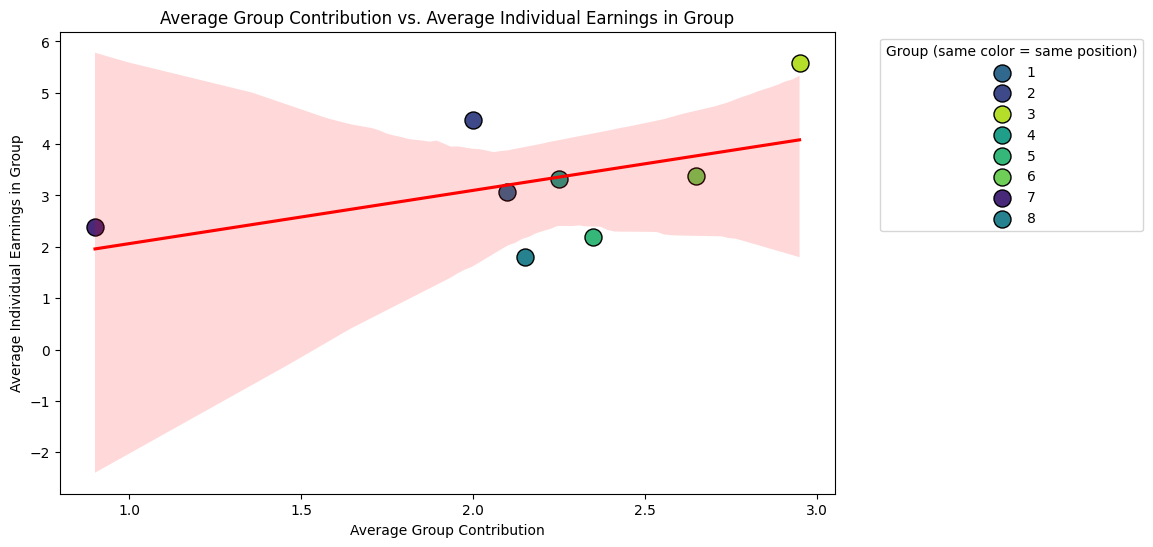

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("/workspace/Voluntary-Contributions/test_2.csv")

# Calculate the average contribution per group
group_avg_contributions = df.groupby('Group')['Contribution'].mean().reset_index(name='avg_contribution')

# Calculate the average cumulative earnings per person in each group
group_avg_individual_earnings = df.groupby('Group')['Earnings'].mean().reset_index(name='avg_individual_earnings')

# Merge the two DataFrames on 'Group'
group_stats = pd.merge(group_avg_contributions, group_avg_individual_earnings, on='Group')

# Check for missing groups in the data
missing_groups = set(range(1, df['Group'].max() + 1)) - set(group_stats['Group'])
if missing_groups:
    print(f"Missing groups in data: {missing_groups}")

# Calculate the correlation
correlation = group_stats['avg_contribution'].corr(group_stats['avg_individual_earnings'])
print(f"Correlation between average group contribution and average individual earnings in the group: {correlation}")

# Group by unique positions to assign colors
group_stats['pos_tuple'] = list(zip(group_stats['avg_contribution'], group_stats['avg_individual_earnings']))
position_groups = group_stats.groupby('pos_tuple')['Group'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
position_groups['Color'] = sns.color_palette("viridis", len(position_groups))

# Merge colors back to the original DataFrame
group_stats = pd.merge(group_stats, position_groups, on='pos_tuple', how='left')

# Plot with unique colors for each position group
plt.figure(figsize=(10, 6))
for i, row in group_stats.iterrows():
    plt.scatter(
        row['avg_contribution'], 
        row['avg_individual_earnings'], 
        color=row['Color'], 
        s=150, 
        edgecolor='black', 
        label=row['Group_y'] if row['Group_y'] else row['Group_x'] 
    )

# Add a regression line without grouping by color
sns.regplot(
    data=group_stats, 
    x='avg_contribution', 
    y='avg_individual_earnings', 
    scatter=False,      
    color='red'         
)

# Customize plot
plt.xlabel('Average Group Contribution')
plt.ylabel('Average Individual Earnings in Group')
plt.title('Average Group Contribution vs. Average Individual Earnings in Group')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Group (same color = same position)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


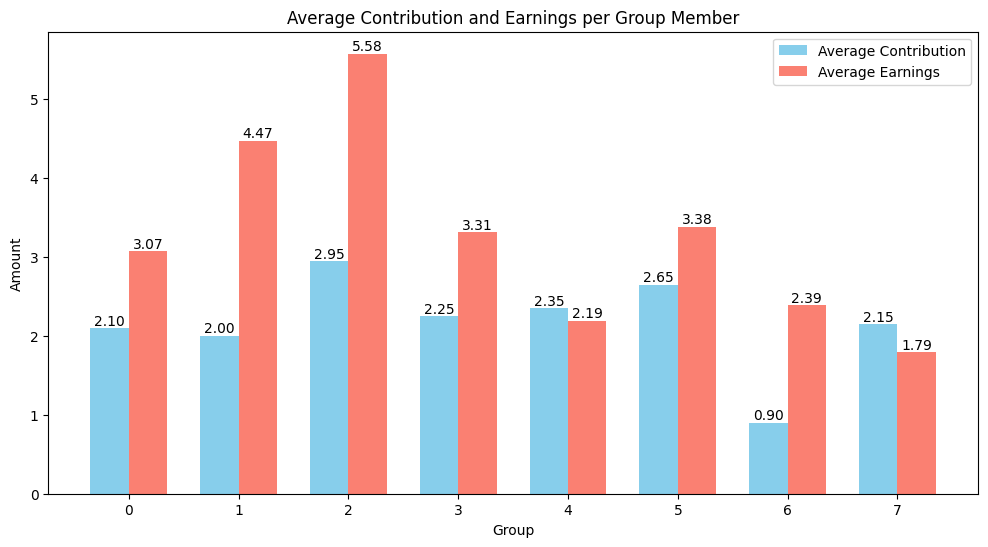

In [21]:
import matplotlib.pyplot as plt

# Set up the bar graph with group names on the x-axis and two sets of bars
plt.figure(figsize=(12, 6))

# Width for each bar group
bar_width = 0.35

# X-axis locations for each group
group_indices = range(len(group_stats))

# Plot bars for average contribution
contrib_bars = plt.bar(
    [x - bar_width / 2 for x in group_indices], 
    group_stats['avg_contribution'], 
    width=bar_width, 
    label='Average Contribution', 
    color='skyblue'
)

# Plot bars for average earnings
earnings_bars = plt.bar(
    [x + bar_width / 2 for x in group_indices], 
    group_stats['avg_individual_earnings'], 
    width=bar_width, 
    label='Average Earnings', 
    color='salmon'
)

# Adding labels and title
plt.xlabel('Group')
plt.ylabel('Amount')
plt.title('Average Contribution and Earnings per Group Member')
plt.legend()

# Adding data labels on top of each bar
for bar in contrib_bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{bar.get_height():.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

for bar in earnings_bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{bar.get_height():.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Display the plot
plt.show()

## How did punishments influence contributions/earnings?